In [514]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-03-15'
ticker = 'UBS'
df = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [515]:
df1 = df['Close']

In [404]:
df1

Date
2020-01-02    12.920000
2020-01-03    12.710000
2020-01-06    12.680000
2020-01-07    12.940000
2020-01-08    13.110000
                ...    
2023-02-27    21.730000
2023-02-28    21.780001
2023-03-01    21.610001
2023-03-02    21.459999
2023-03-03    22.120001
Name: Close, Length: 798, dtype: float64

<AxesSubplot:xlabel='Date'>

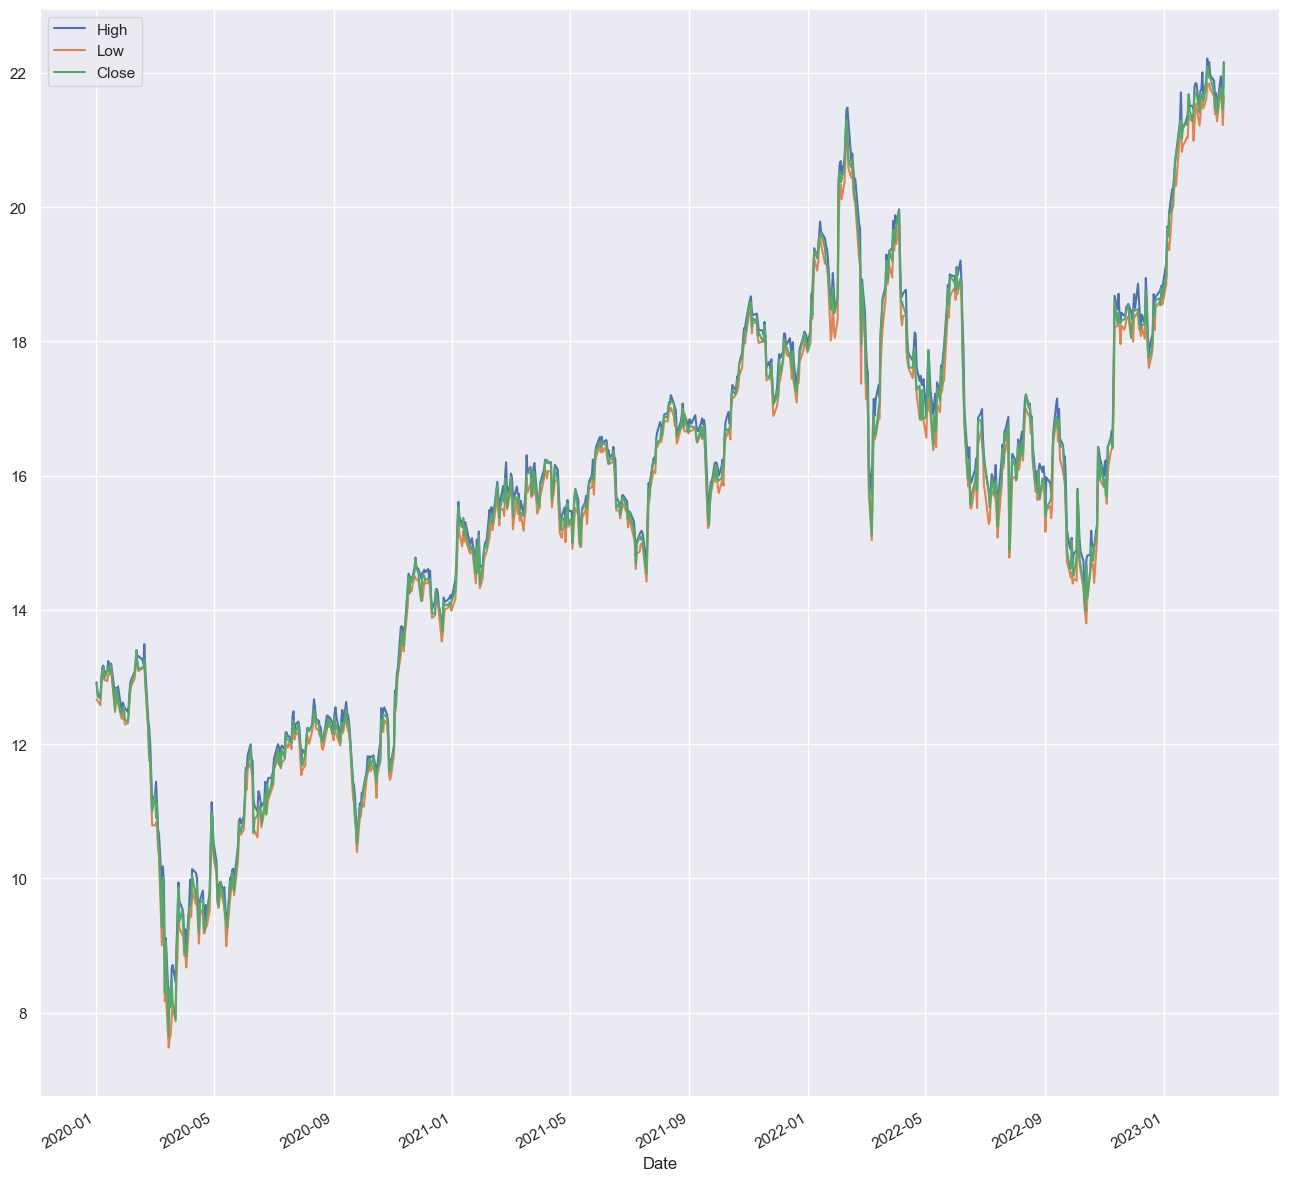

In [75]:
df[['High','Low','Close']].plot()

<AxesSubplot:xlabel='Date'>

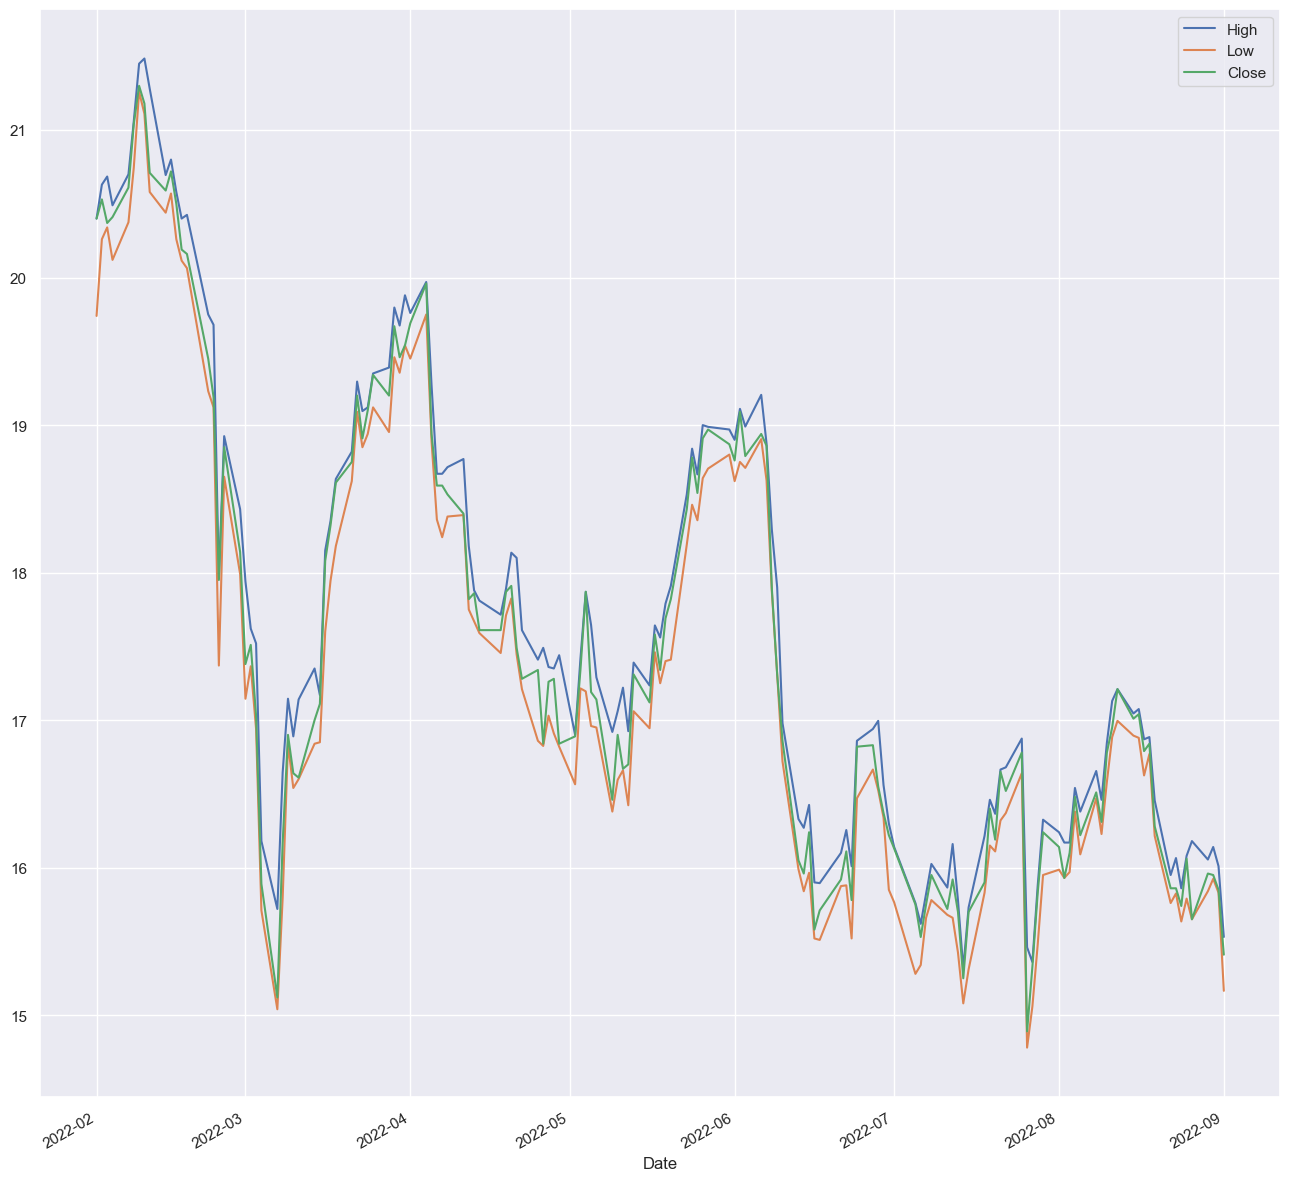

In [86]:
df[['High','Low','Close']].loc['2022-02-01':'2022-09-01'].plot()

<AxesSubplot:xlabel='Date'>

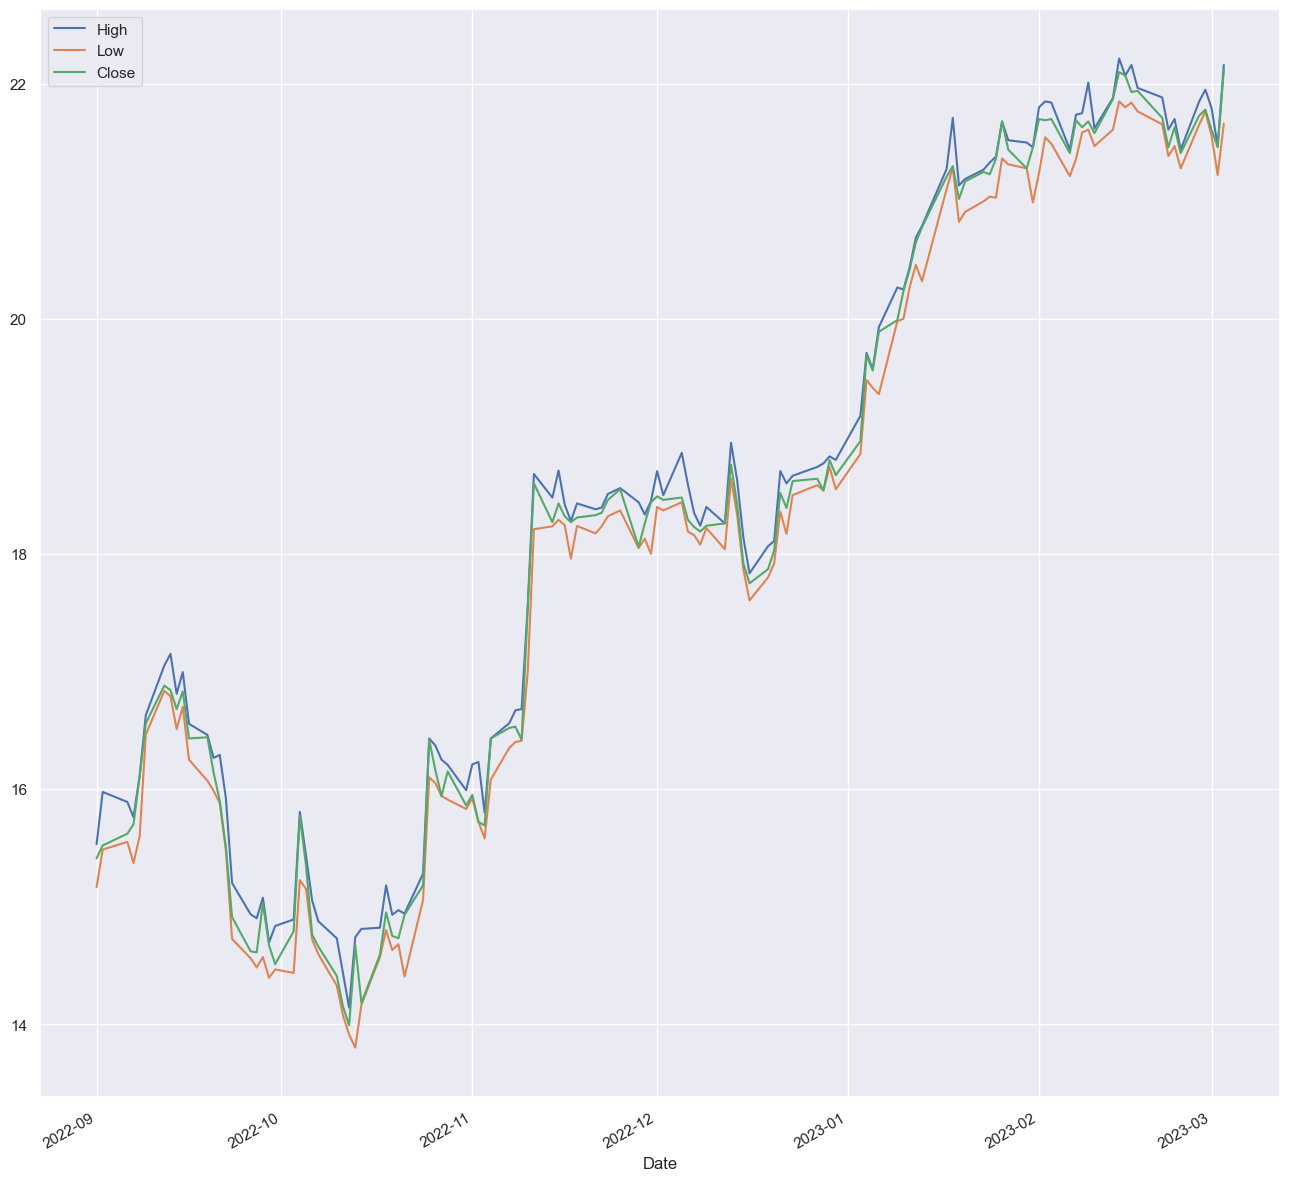

In [85]:
df[['High','Low','Close']].loc['2022-09-01':'2023-03-03'].plot()

<AxesSubplot:xlabel='Date'>

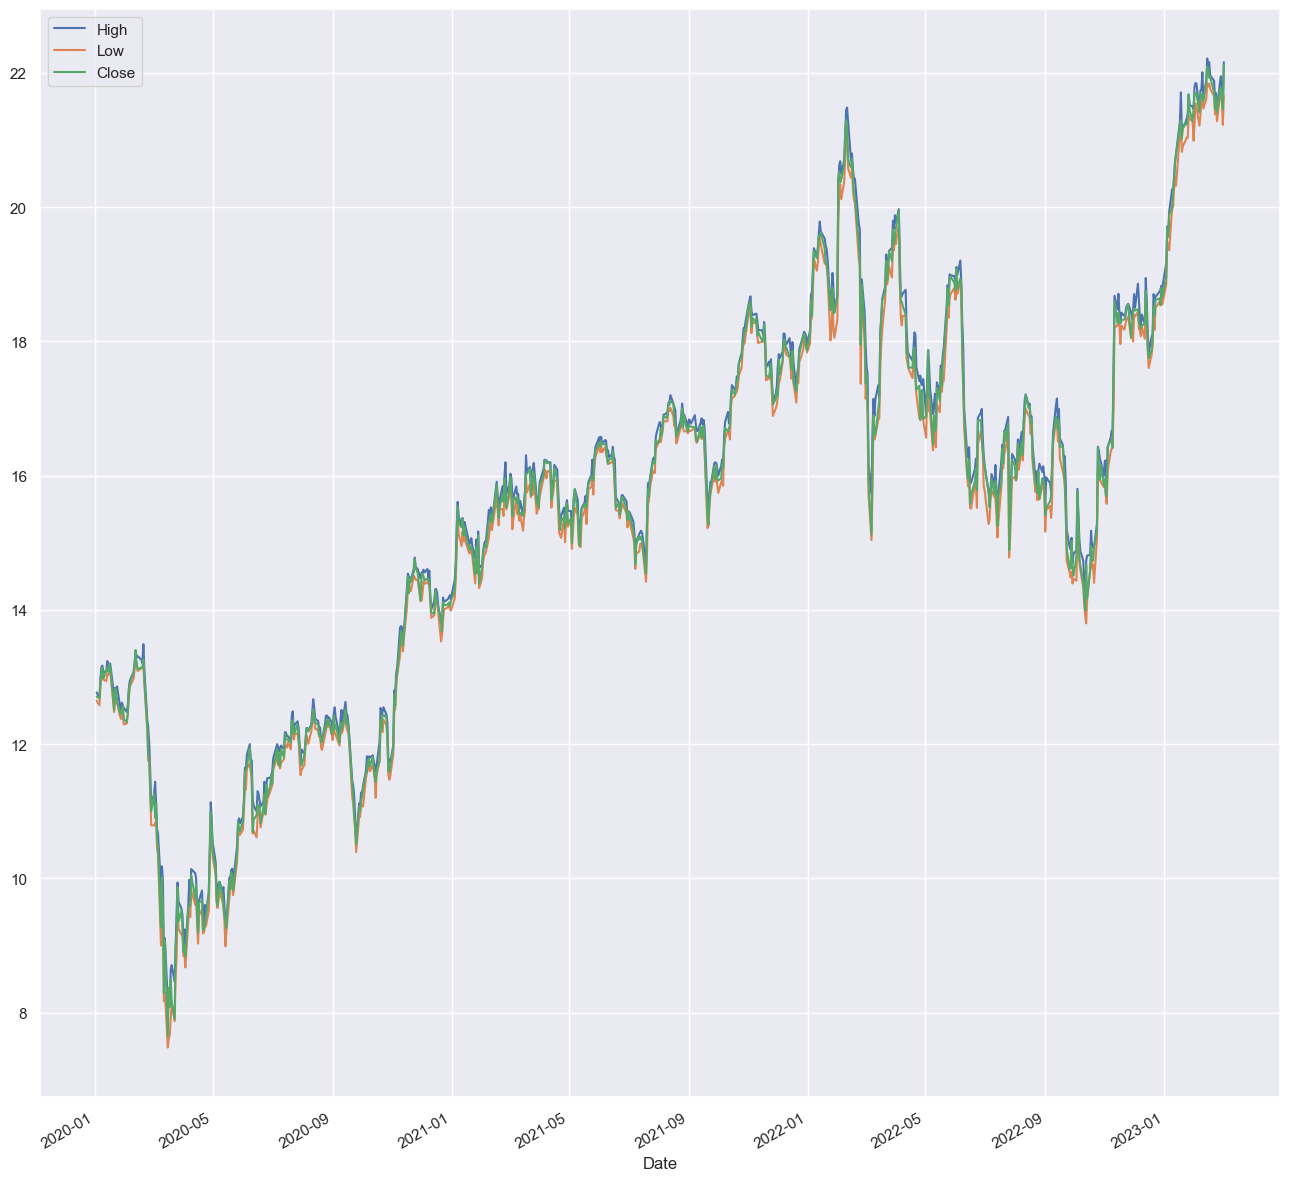

In [93]:
df[['High','Low','Close']].loc['2020-01-03':'2023-03-03'].plot()

In [97]:
import pandas as pd
import numpy as np
%matplotlib inline


from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima    

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [128]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12.70,12.920,12.670,12.92,11.542475,3352200
2020-01-03,12.68,12.770,12.650,12.71,11.354865,2627400
2020-01-06,12.60,12.700,12.580,12.68,11.328064,2318500
2020-01-07,12.92,12.985,12.863,12.94,11.560342,4237600
2020-01-08,13.07,13.150,13.050,13.11,11.712216,3363200


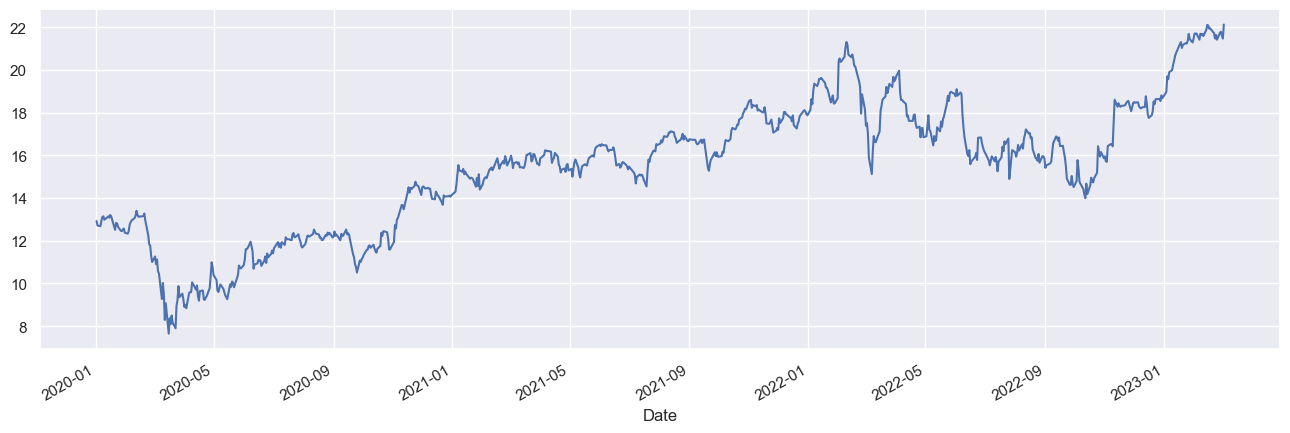

In [133]:
ax = df['Close'].plot(figsize=(16,5))
ax.autoscale(axis='Date',tight=True)

In [178]:
df1 = df1.asfreq('D')
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12.700000,12.920000,12.670000,12.920000,11.542475,3352200.0
2020-01-03,12.680000,12.770000,12.650000,12.710000,11.354865,2627400.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,12.600000,12.700000,12.580000,12.680000,11.328064,2318500.0
...,...,...,...,...,...,...
2023-02-27,21.770000,21.850000,21.653000,21.730000,21.730000,1069500.0
2023-02-28,21.920000,21.950001,21.764999,21.780001,21.780001,1533900.0
2023-03-01,21.709999,21.795000,21.559999,21.610001,21.610001,1757900.0


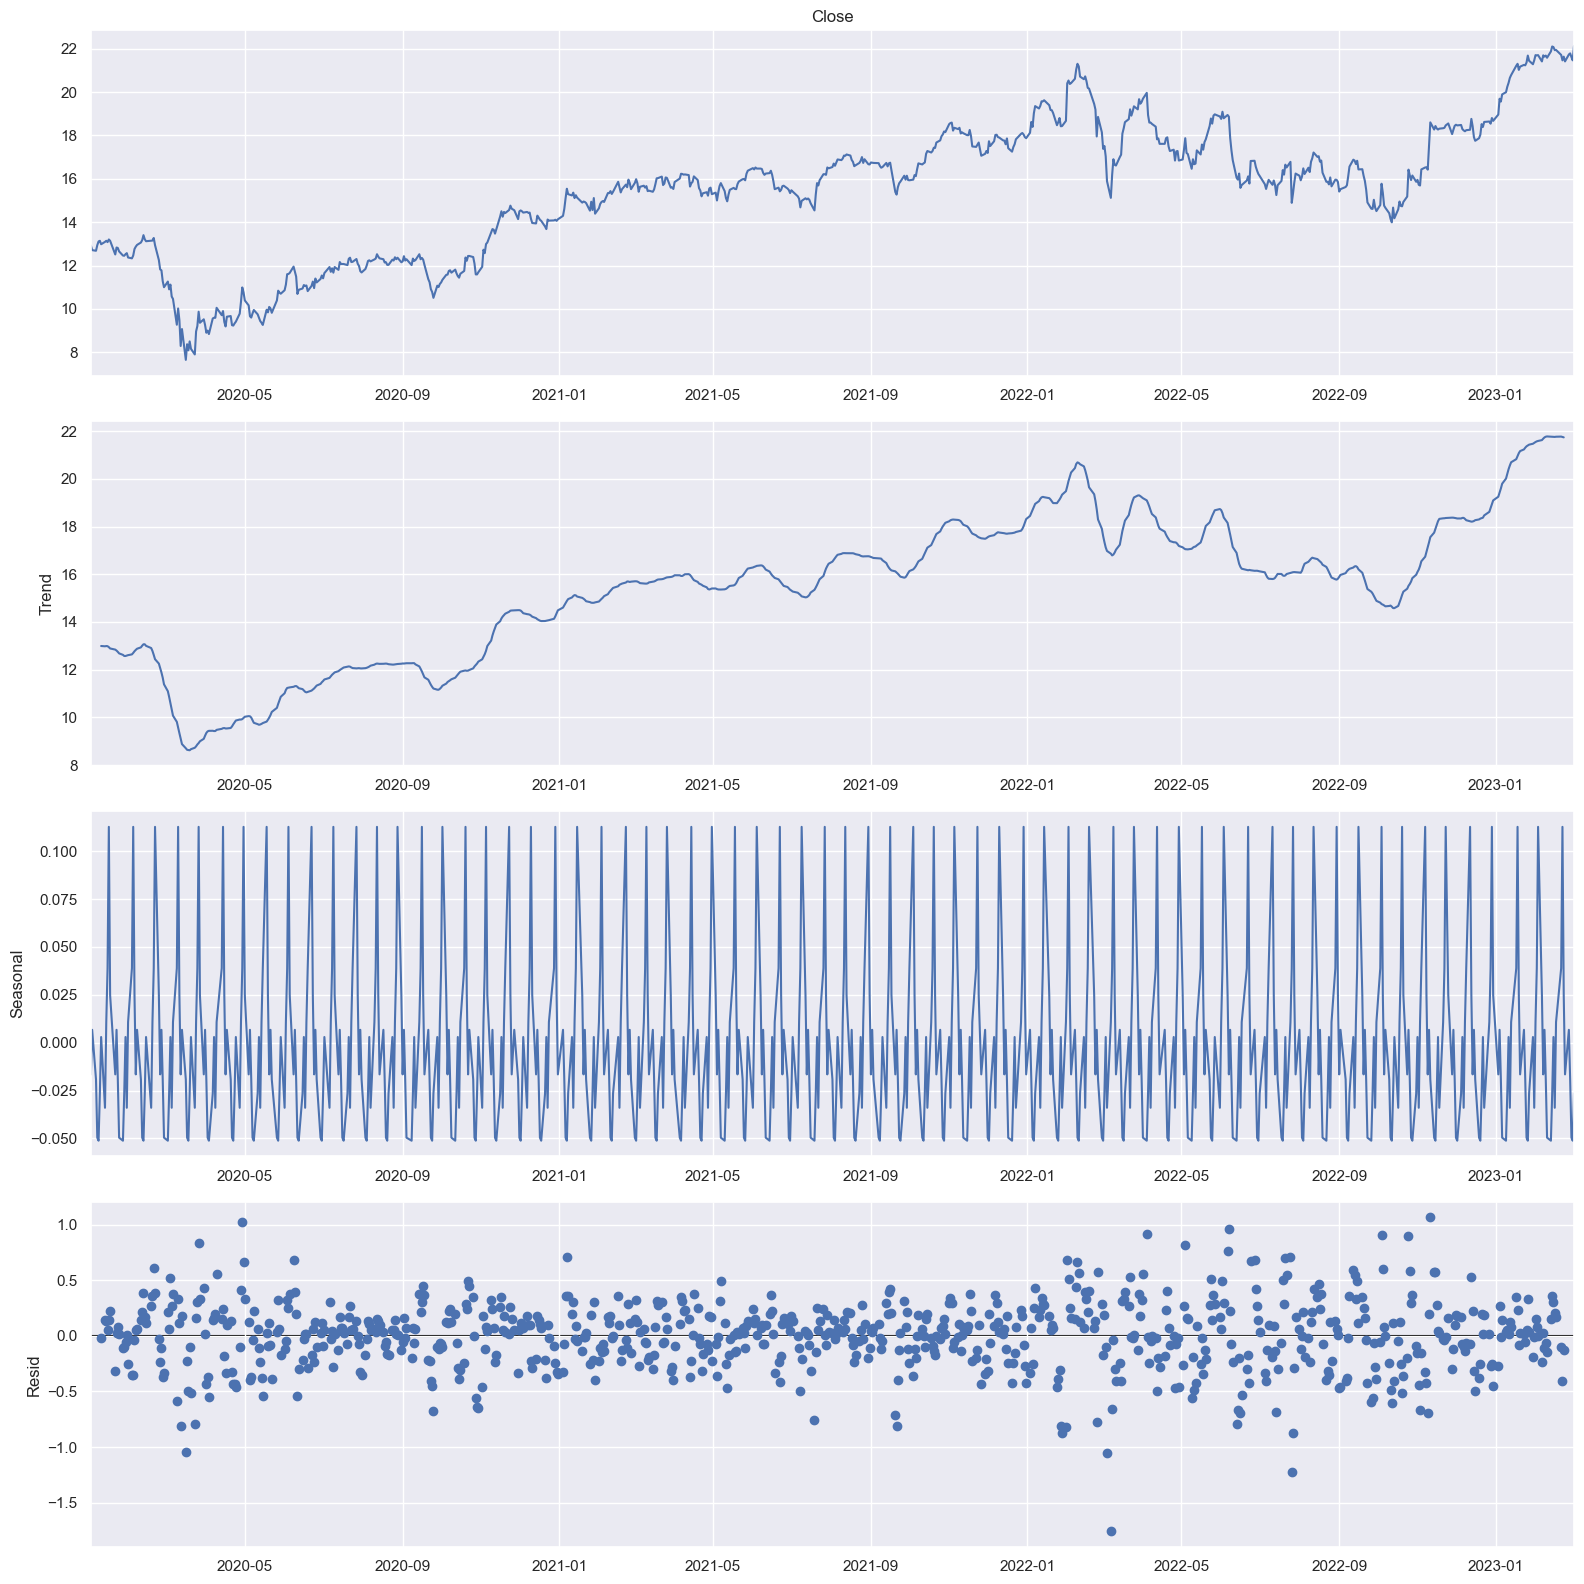

In [697]:
seasonal_decompose(df1[pd.isnull(df1)==False],period=12).plot();

In [430]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())         
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [431]:
adf_test(ddf)

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.747520
p-value                   0.834054
# lags used              11.000000
# observations          786.000000
critical value (1%)      -3.438697
critical value (5%)      -2.865224
critical value (10%)     -2.568732
Fail to reject the null hypothesis
Data is non-stationary


In [211]:
df2 = df['Close'] - df['Close'].shift(1)

adf_test(df2)

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.143149e+00
p-value                 2.813802e-15
# lags used             1.000000e+01
# observations          7.860000e+02
critical value (1%)    -3.438697e+00
critical value (5%)    -2.865224e+00
critical value (10%)   -2.568732e+00
Reject the null hypothesis
Data is stationary


In [209]:
df['Close']

Date
2020-01-02    12.920000
2020-01-03    12.710000
2020-01-06    12.680000
2020-01-07    12.940000
2020-01-08    13.110000
                ...    
2023-02-27    21.730000
2023-02-28    21.780001
2023-03-01    21.610001
2023-03-02    21.459999
2023-03-03    22.120001
Name: Close, Length: 798, dtype: float64

In [210]:
df['Close'].shift(1)

Date
2020-01-02          NaN
2020-01-03    12.920000
2020-01-06    12.710000
2020-01-07    12.680000
2020-01-08    12.940000
                ...    
2023-02-27    21.410000
2023-02-28    21.730000
2023-03-01    21.780001
2023-03-02    21.610001
2023-03-03    21.459999
Name: Close, Length: 798, dtype: float64

In [281]:
df['Close'] - df['Close'].shift(1)

Date
2020-01-02         NaN
2020-01-03   -0.210000
2020-01-06   -0.030000
2020-01-07    0.259999
2020-01-08    0.170000
                ...   
2023-02-27    0.320000
2023-02-28    0.050001
2023-03-01   -0.170000
2023-03-02   -0.150002
2023-03-03    0.660002
Name: Close, Length: 798, dtype: float64

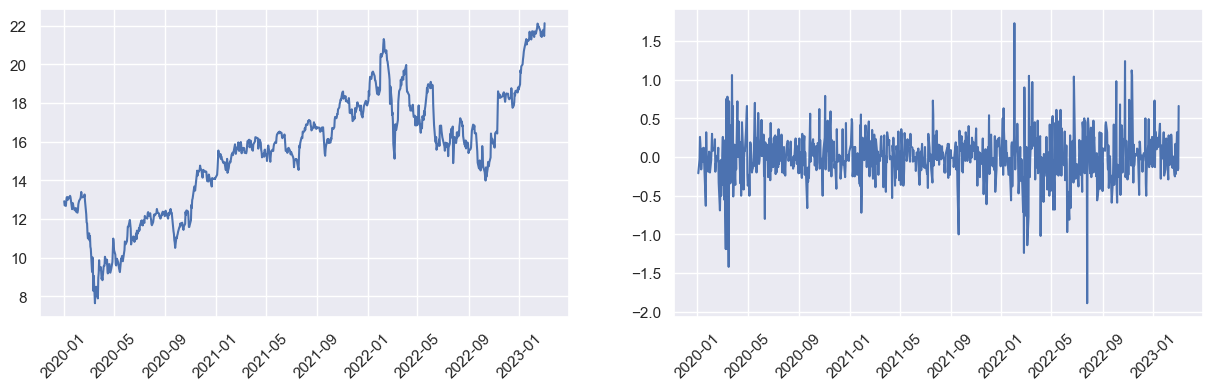

In [280]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(df['Close'])
#ax.set_xticklabels(df.index.strftime('%Y-%m-%d'), rotation=30);
ax.tick_params(axis='x', labelrotation=45)
ax2.plot(df['Close'] - df['Close'].shift(1))
#ax2.set_xticklabels(df.index.strftime('%Y-%m-%d'), rotation=30);
ax2.tick_params(axis='x', labelrotation=45)


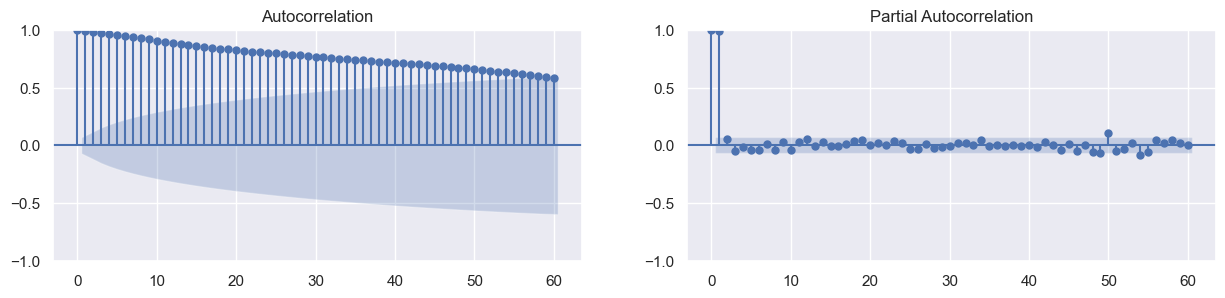

In [306]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
plot_acf(df['Close'], lags=60, ax=ax[0])
plot_pacf(df['Close'], lags=60, ax=ax[1])
plt.show()

In [698]:
auto_arima((df1[pd.isnull(df1)==False])).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  798
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -233.228
Date:                Sun, 05 Mar 2023   AIC                            468.456
Time:                        18:41:45   BIC                            473.137
Sample:                             0   HQIC                           470.254
                                - 798                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1051      0.003     34.756      0.000       0.099       0.111
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):               562.15
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [315]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults


In [318]:
import statsmodels.api as sm

In [738]:
len(df1)

1157

In [739]:
train = df1[:1140]
test = df1[1140:]

In [740]:
test.index

DatetimeIndex(['2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
               '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
               '2023-03-03'],
              dtype='datetime64[ns]', name='Date', freq='D')

In [741]:
model = sm.tsa.arima.ARIMA(train,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1140
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -263.288
Date:                Sun, 05 Mar 2023   AIC                            528.575
Time:                        19:00:42   BIC                            533.613
Sample:                    01-02-2020   HQIC                           530.478
                         - 02-14-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0901      0.002     37.552      0.000       0.085       0.095
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):              3748.21
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [742]:
len(test)

17

In [743]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end,)

In [744]:
predictions

2023-02-15    22.1
2023-02-16    22.1
2023-02-17    22.1
2023-02-18    22.1
2023-02-19    22.1
2023-02-20    22.1
2023-02-21    22.1
2023-02-22    22.1
2023-02-23    22.1
2023-02-24    22.1
2023-02-25    22.1
2023-02-26    22.1
2023-02-27    22.1
2023-02-28    22.1
2023-03-01    22.1
2023-03-02    22.1
2023-03-03    22.1
Freq: D, Name: predicted_mean, dtype: float64

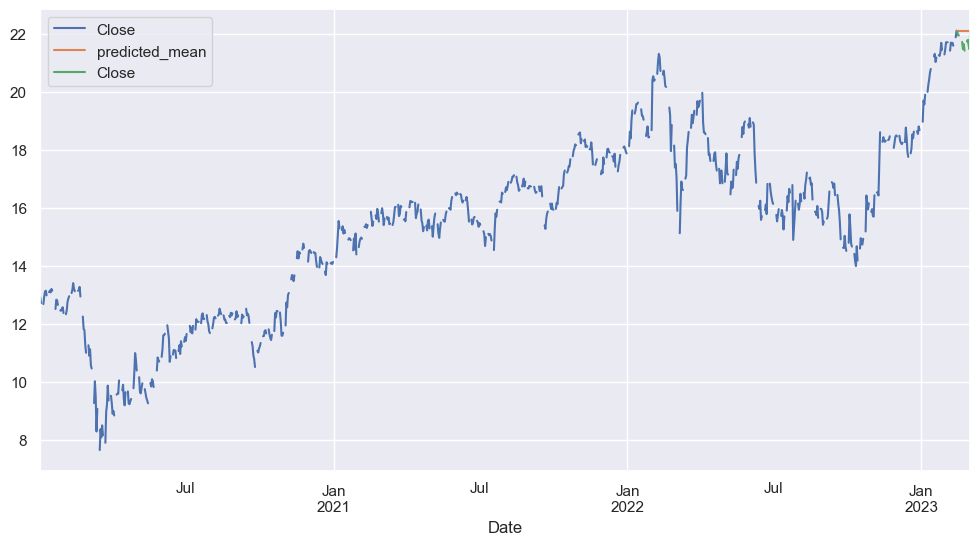

In [745]:
ax = train.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
test.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [746]:
predictions

2023-02-15    22.1
2023-02-16    22.1
2023-02-17    22.1
2023-02-18    22.1
2023-02-19    22.1
2023-02-20    22.1
2023-02-21    22.1
2023-02-22    22.1
2023-02-23    22.1
2023-02-24    22.1
2023-02-25    22.1
2023-02-26    22.1
2023-02-27    22.1
2023-02-28    22.1
2023-03-01    22.1
2023-03-02    22.1
2023-03-03    22.1
Freq: D, Name: predicted_mean, dtype: float64

In [747]:
from statsmodels.tsa.arima_model import ARIMA

In [748]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [749]:
df1

Date
2020-01-02    12.920000
2020-01-03    12.710000
2020-01-04          NaN
2020-01-05          NaN
2020-01-06    12.680000
                ...    
2023-02-27    21.730000
2023-02-28    21.780001
2023-03-01    21.610001
2023-03-02    21.459999
2023-03-03    22.120001
Freq: D, Name: Close, Length: 1157, dtype: float64

In [750]:
predicted = model_fit.forecast(50) 

In [751]:
predicted


768    21.029663
769    21.024812
770    21.027247
771    21.026024
772    21.026638
773    21.026330
774    21.026485
775    21.026407
776    21.026446
777    21.026426
778    21.026436
779    21.026431
780    21.026434
781    21.026433
782    21.026433
783    21.026433
784    21.026433
785    21.026433
786    21.026433
787    21.026433
788    21.026433
789    21.026433
790    21.026433
791    21.026433
792    21.026433
793    21.026433
794    21.026433
795    21.026433
796    21.026433
797    21.026433
798    21.026433
799    21.026433
800    21.026433
801    21.026433
802    21.026433
803    21.026433
804    21.026433
805    21.026433
806    21.026433
807    21.026433
808    21.026433
809    21.026433
810    21.026433
811    21.026433
812    21.026433
813    21.026433
814    21.026433
815    21.026433
816    21.026433
817    21.026433
Name: predicted_mean, dtype: float64

In [752]:
train[pd.isnull(train)==False]

Date
2020-01-02    12.920000
2020-01-03    12.710000
2020-01-06    12.680000
2020-01-07    12.940000
2020-01-08    13.110000
                ...    
2023-02-08    21.629999
2023-02-09    21.680000
2023-02-10    21.580000
2023-02-13    21.870001
2023-02-14    22.100000
Name: Close, Length: 786, dtype: float64

In [777]:
smodel = auto_arima(train[pd.isnull(train)==False], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=6,
                         seasonal=True,
                         d=None, D=1)

# orginal data - non-stationary
# seasonal=True,
# D=1 

In [778]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  786
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -344.220
Date:                           Sun, 05 Mar 2023   AIC                            696.440
Time:                                   19:15:05   BIC                            715.077
Sample:                                        0   HQIC                           703.608
                                           - 786                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9317      0.010     91.523      0.000       0.912       0.952
ar.S.L6       -0.6652      0.027    -24.860      0.000      -0.718      -0.613
ar.S.L12      -0.3166      0.030    -10.603      0.000      -0.375      -0.258
sigma2         0.1408      0.004     31.449      0.000       0.132       0.150
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):               344.71
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [779]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 0, 0),seasonal_order=(2,1,0,6),)

results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 1140
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -389.159
Date:                           Sun, 05 Mar 2023   AIC                            786.318
Time:                                   19:15:38   BIC                            806.452
Sample:                               01-02-2020   HQIC                           793.924
                                    - 02-14-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9258      0.009    102.190      0.000       0.908       0.944
ar.S.L6       -0.6019      0.035    -17.342      0.000      -0.670      -0.534
ar.S.L12      -0.3885      0.033    -11.770      0.000      -0.453      -0.324
sigma2         0.1088      0.003     31.832      0.000       0.102       0.116
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1866.96
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [780]:
pre=results.predict(start= 1140, end= len(df1),dynamic=True)
pre

2023-02-15    22.097792
2023-02-16    21.939906
2023-02-17    21.845002
2023-02-18    21.888644
2023-02-19    22.126725
2023-02-20    22.174792
2023-02-21    22.163667
2023-02-22    22.001307
2023-02-23    21.904833
2023-02-24    21.883263
2023-02-25    22.129725
2023-02-26    22.157775
2023-02-27    22.156679
2023-02-28    22.005037
2023-03-01    21.912848
2023-03-02    21.922710
2023-03-03    22.171431
2023-03-04    22.271581
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

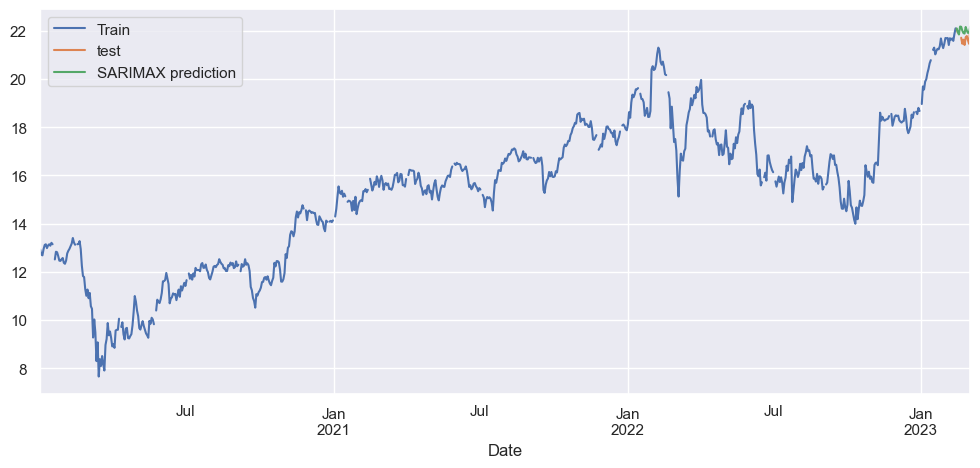

In [784]:
train.asfreq('B').plot(legend=True, label='Train', figsize=(12,5))
test.asfreq('B').plot(legend=True, label='test')
pre.asfreq('B').plot(legend=True, label='SARIMAX prediction')

<AxesSubplot:xlabel='Date'>

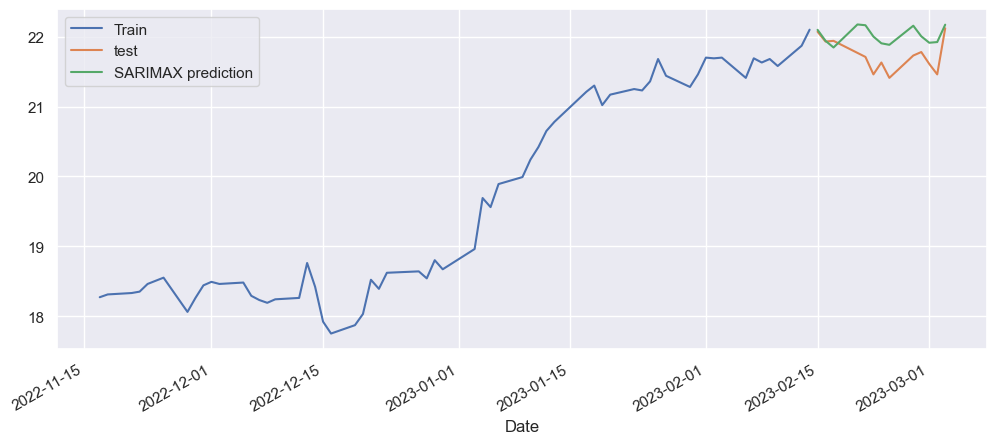

In [786]:
train[pd.isna(train)==False][-60:].plot(legend=True, label='Train', figsize=(12,5))
test[pd.isna(test)==False].plot(legend=True, label='test')
pre.asfreq('B').plot(legend=True, label='SARIMAX prediction')

In [783]:
len(pre.asfreq('B'))

13